# Categorical

## Bar Chart (column chart)

In [1]:
import pandas as pd
import requests
import bs4
import matplotlib.pyplot as plt

In [53]:

page = "https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories"
r = requests.get(page);
r.text
soup = bs4.BeautifulSoup(r.text)

table = soup.find('table')
rows = table.find_all('tr')

arr = []
for i in rows:
    table_data = i.find_all('td')
    # table_data = table_data[0]
    data = [j.text for j in table_data]
    if len(data) == 0:
        continue
    else:
        arr.append(data)

df = pd.DataFrame(arr)

# data cleaning
df = df.drop([1, 2], axis=1)
df[0] = df[0].apply(lambda x:  x.strip("\n"))
df[0] = df[0].apply(lambda x:  x.strip("†"))
df[3] = df[3].astype(int)
df[4] = df[4].astype(int)

df = df.rename(columns = {0 : 'Actor', 3 : 'Wins', 4 : 'Nominations'})

In [3]:
df.sort_values(by = 'Nominations', inplace = True, ascending = False)

In [4]:
df.reset_index(inplace = True, drop = True)

In [5]:
df_red = df.iloc[:10, ]

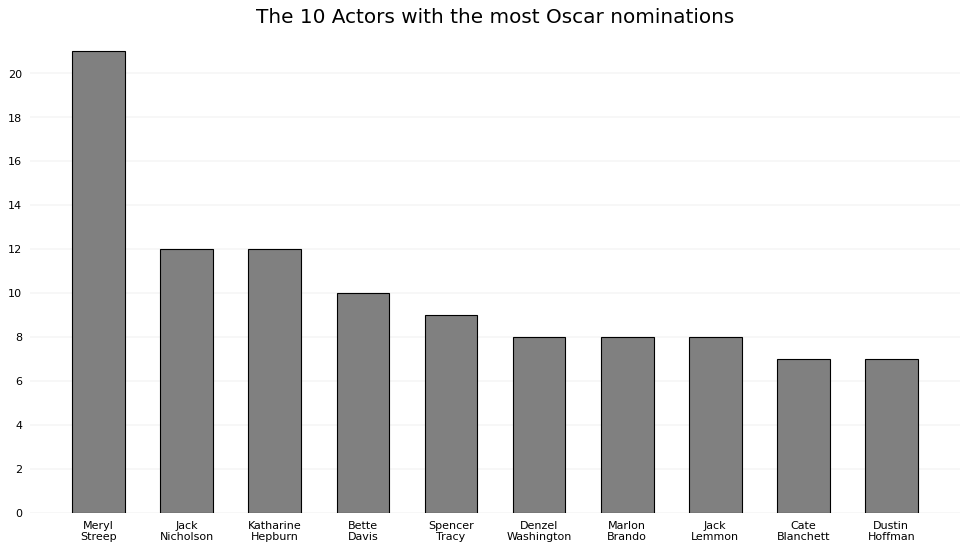

In [57]:
fig, ax = plt.subplots(figsize = (15, 8), dpi = 80)

#barplot
ax.bar(x = df_red['Actor'], 
       height = df_red['Nominations'],
       width = 0.6,
       color = 'grey',
       edgecolor = 'black',
       zorder = 3)

#ticks
labels = ['\n'.join(i.split()) for i in df_red.Actor]
ax.set_xticks(range(0, 10), labels)
ax.set_yticks(range(0, 22, 2))
ax.set_ylim(0, 22)

#horizontal lines
ax.grid(zorder = 0, axis = 'y', which = 'major',
       alpha = 0.4, linewidth = 0.4)

#remove borders
for i in ['top', 'bottom', 'right', 'left']:
    ax.spines[i].set_visible(False)

#title
ax.set_title('The 10 Actors with the most Oscar nominations', fontsize = 18)

#remove tick marks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.show()

## Clustered bar chart (clustered column chart, paired bar chart)

In [61]:
import pandas as pd
import requests
import bs4
import matplotlib.pyplot as plt
import numpy as np


page = "https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories"
r = requests.get(page);
r.text
soup = bs4.BeautifulSoup(r.text)

table = soup.find('table')
rows = table.find_all('tr')

arr = []
for i in rows:
    table_data = i.find_all('td')
    # table_data = table_data[0]
    data = [j.text for j in table_data]
    if len(data) == 0:
        continue
    else:
        arr.append(data)

df = pd.DataFrame(arr)

# data cleaning
df = df.drop([1, 2], axis=1)
df[0] = df[0].apply(lambda x:  x.strip("\n"))
df[0] = df[0].apply(lambda x:  x.strip("†"))
df[3] = df[3].astype(int)
df[4] = df[4].astype(int)

df = df.rename(columns = {0 : 'Actor', 3 : 'Wins', 4 : 'Nominations'})

df.sort_values(by = 'Nominations', inplace = True, ascending = False)

df.reset_index(inplace = True, drop = True)

df_red = df.iloc[:10, ]

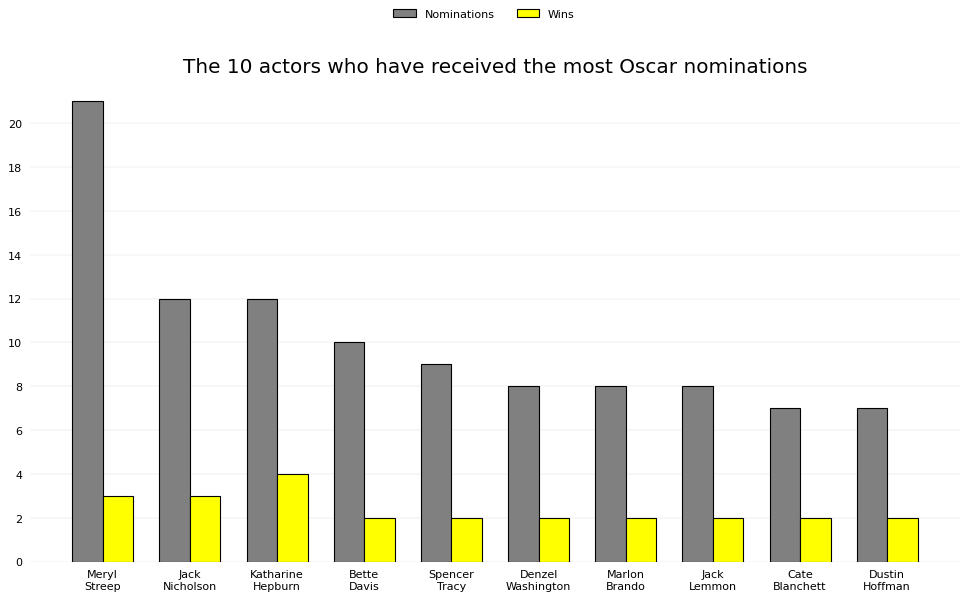

In [94]:
fig, ax = plt.subplots(figsize = (15, 8), dpi = 80)

x = np.arange(len(df_red.index))

width = 0.35

#barplots
l_bar = ax.bar(x - 0.35 / 2, df_red['Nominations'], width = 0.35, label = 'Nominations',
              color = 'grey',
              edgecolor = 'black',
              zorder = 3)

r_bar = ax.bar(x + 0.35 / 2, df_red['Wins'], width = 0.35, label = 'Wins',
              color = 'yellow',
              edgecolor = 'black',
              zorder = 3)


#add horizontal lines
ax.grid(zorder = 0, axis = 'y', which = 'major', alpha = 0.4, linewidth = 0.4)


#add xtick labels
labels = ['\n'.join(i.split()) for i in df_red.Actor]
ax.set_xticks(range(0, 10), labels)

#set yticks
ax.set_yticks(range(0,21, 2))

#remove borders
for i in ['top', 'bottom', 'right', 'left']:
    ax.spines[i].set_visible(False)


#horizontal lines
ax.grid(zorder = 0, axis = 'y', which = 'major',
       alpha = 0.4, linewidth = 0.4)


#remove borders
for i in ['top', 'bottom', 'right', 'left']:
    ax.spines[i].set_visible(False)
    
    
#remove tick marks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


#legend

fig.legend(loc = 'upper center', ncol = 2, frameon = False)

#title
ax.set_title('The 10 actors who have received the most Oscar nominations', fontsize = 18)


plt.show()

## Dot plot

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'Taiwan' : {'male' : 2749, 'female' : 956},
        'Georgia' : {'male' : 444, 'female' : 161},
        'South Korea' : {'male' : 7172, 'female' : 3370},
        'Iran' : {'male' : 3257, 'female' : 1531},
        'Iraq' : {'male' : 3434, 'female' : 1622},
        'Jordan' : {'male' : 316, 'female' : 156},
        'Uganda' : {'male' : 673, 'female' : 341},
        'Malaysia' : {'male' : 495, 'female' : 255},
        'Saudi Arabia' : {'male' : 227, 'female' : 122},
        'Armenia' : {'male' : 393, 'female' : 221},
        'Colombia' : {'male' : 124, 'female' : 78},
        'Lebanon' : {'male' : 76, 'female' :48},
        'Czech Republic' : {'male' : 1358, 'female' :870},
        'Morocco' : {'male' : 3916, 'female' : 2564},
        'Greece' : {'male' : 1100, 'female' : 792},
        'Switzerland' : {'male' : 2196, 'female' : 1604},
        'Austria' : {'male' : 1436, 'female' : 1064},
        'Belgium' : {'male' : 1221, 'female' : 905},
        'France' : {'male' : 6856, 'female' : 5085},
        'Canada' : {'male' : 3021, 'female' : 2395},
        'Germany' : {'male' : 14506, 'female' : 11533},
        'Iceland' : {'male' : 20, 'female' : 16},
        'Turkey' : {'male' : 2591, 'female' : 2093},
        'Norway' : {'male' : 664, 'female' : 538},
        'Denmark' : {'male' : 764, 'female' : 624},
        'United Kingdom' : {'male' : 10265, 'female' : 8485},
        'Mexico' : {'male' : 2280, 'female' : 1887},
        'Chile' : {'male' : 231, 'female' : 192},
        'Madagascar' : {'male' : 307, 'female' : 258},
        'Algeria' : {'male' : 4310, 'female' : 3649},
        'Slovenia' : {'male' : 251, 'female' : 214},
        'Hungary' : {'male' : 680, 'female' : 595},
        'Spain' : {'male' : 4608, 'female' : 4088},
        'Romania' : {'male' : 2490, 'female' : 2274},
        'Ireland' : {'male' : 638, 'female' : 584},
        'Bulgaria' : {'male' : 311, 'female' : 285},
        'Sweden' : {'male' : 1744, 'female' : 1627},
        'Slovak Republic' : {'male' : 1471, 'female' : 1407},
        'United States' : {'male' : 29008, 'female' : 28397},
        'Australia' : {'male' : 5825 - 2911, 'female' : 2911},
        'Israel' : {'male' : 756, 'female' : 778},
        'Macedonia' : {'male' : 77, 'female' : 80},
        'Croatia' : {'male' : 410, 'female' : 428},
        'Italy' : {'male' : 4960, 'female' : 5228},
        'Estonia' : {'male' : 83, 'female' : 92},
        'New Zealand' : {'male' : 461, 'female' : 526},
        'Finland' : {'male' : 813, 'female' : 937},
        'Ukraine' : {'male' : 4080, 'female' : 4838},
        'Kyrgyzstan' : {'male' : 307, 'female' : 252},
        'Argentina' : {'male' : 422, 'female' : 515},
        'Mongolia' : {'male' : 61, 'female' : 75},
        'Thailand' : {'male' : 1273, 'female' : 1716},
        'Lithuania' : {'male' : 171, 'female' : 235},
        'Uruguay' : {'male' : 16, 'female' : 23},
        'Latvia' : {'male' : 53, 'female' : 79},
        'Portugal' : {'male' : 1111, 'female' : 1816}}

df = pd.DataFrame.from_dict(data).transpose()

df['perc_male'] = round(df.male / (df.male + df.female), 2)

df['perc_female'] = 1 - df['perc_male']

df.sort_values(by = 'perc_male', inplace = True, ascending = False)

In [15]:
df

,male,female,perc_male,perc_female
Taiwan,2749,956,0.74,0.26
Georgia,444,161,0.73,0.27
South Korea,7172,3370,0.68,0.32
Iran,3257,1531,0.68,0.32
Iraq,3434,1622,0.68,0.32
Jordan,316,156,0.67,0.33
Uganda,673,341,0.66,0.34
Malaysia,495,255,0.66,0.34
Saudi Arabia,227,122,0.65,0.35
Armenia,393,221,0.64,0.36


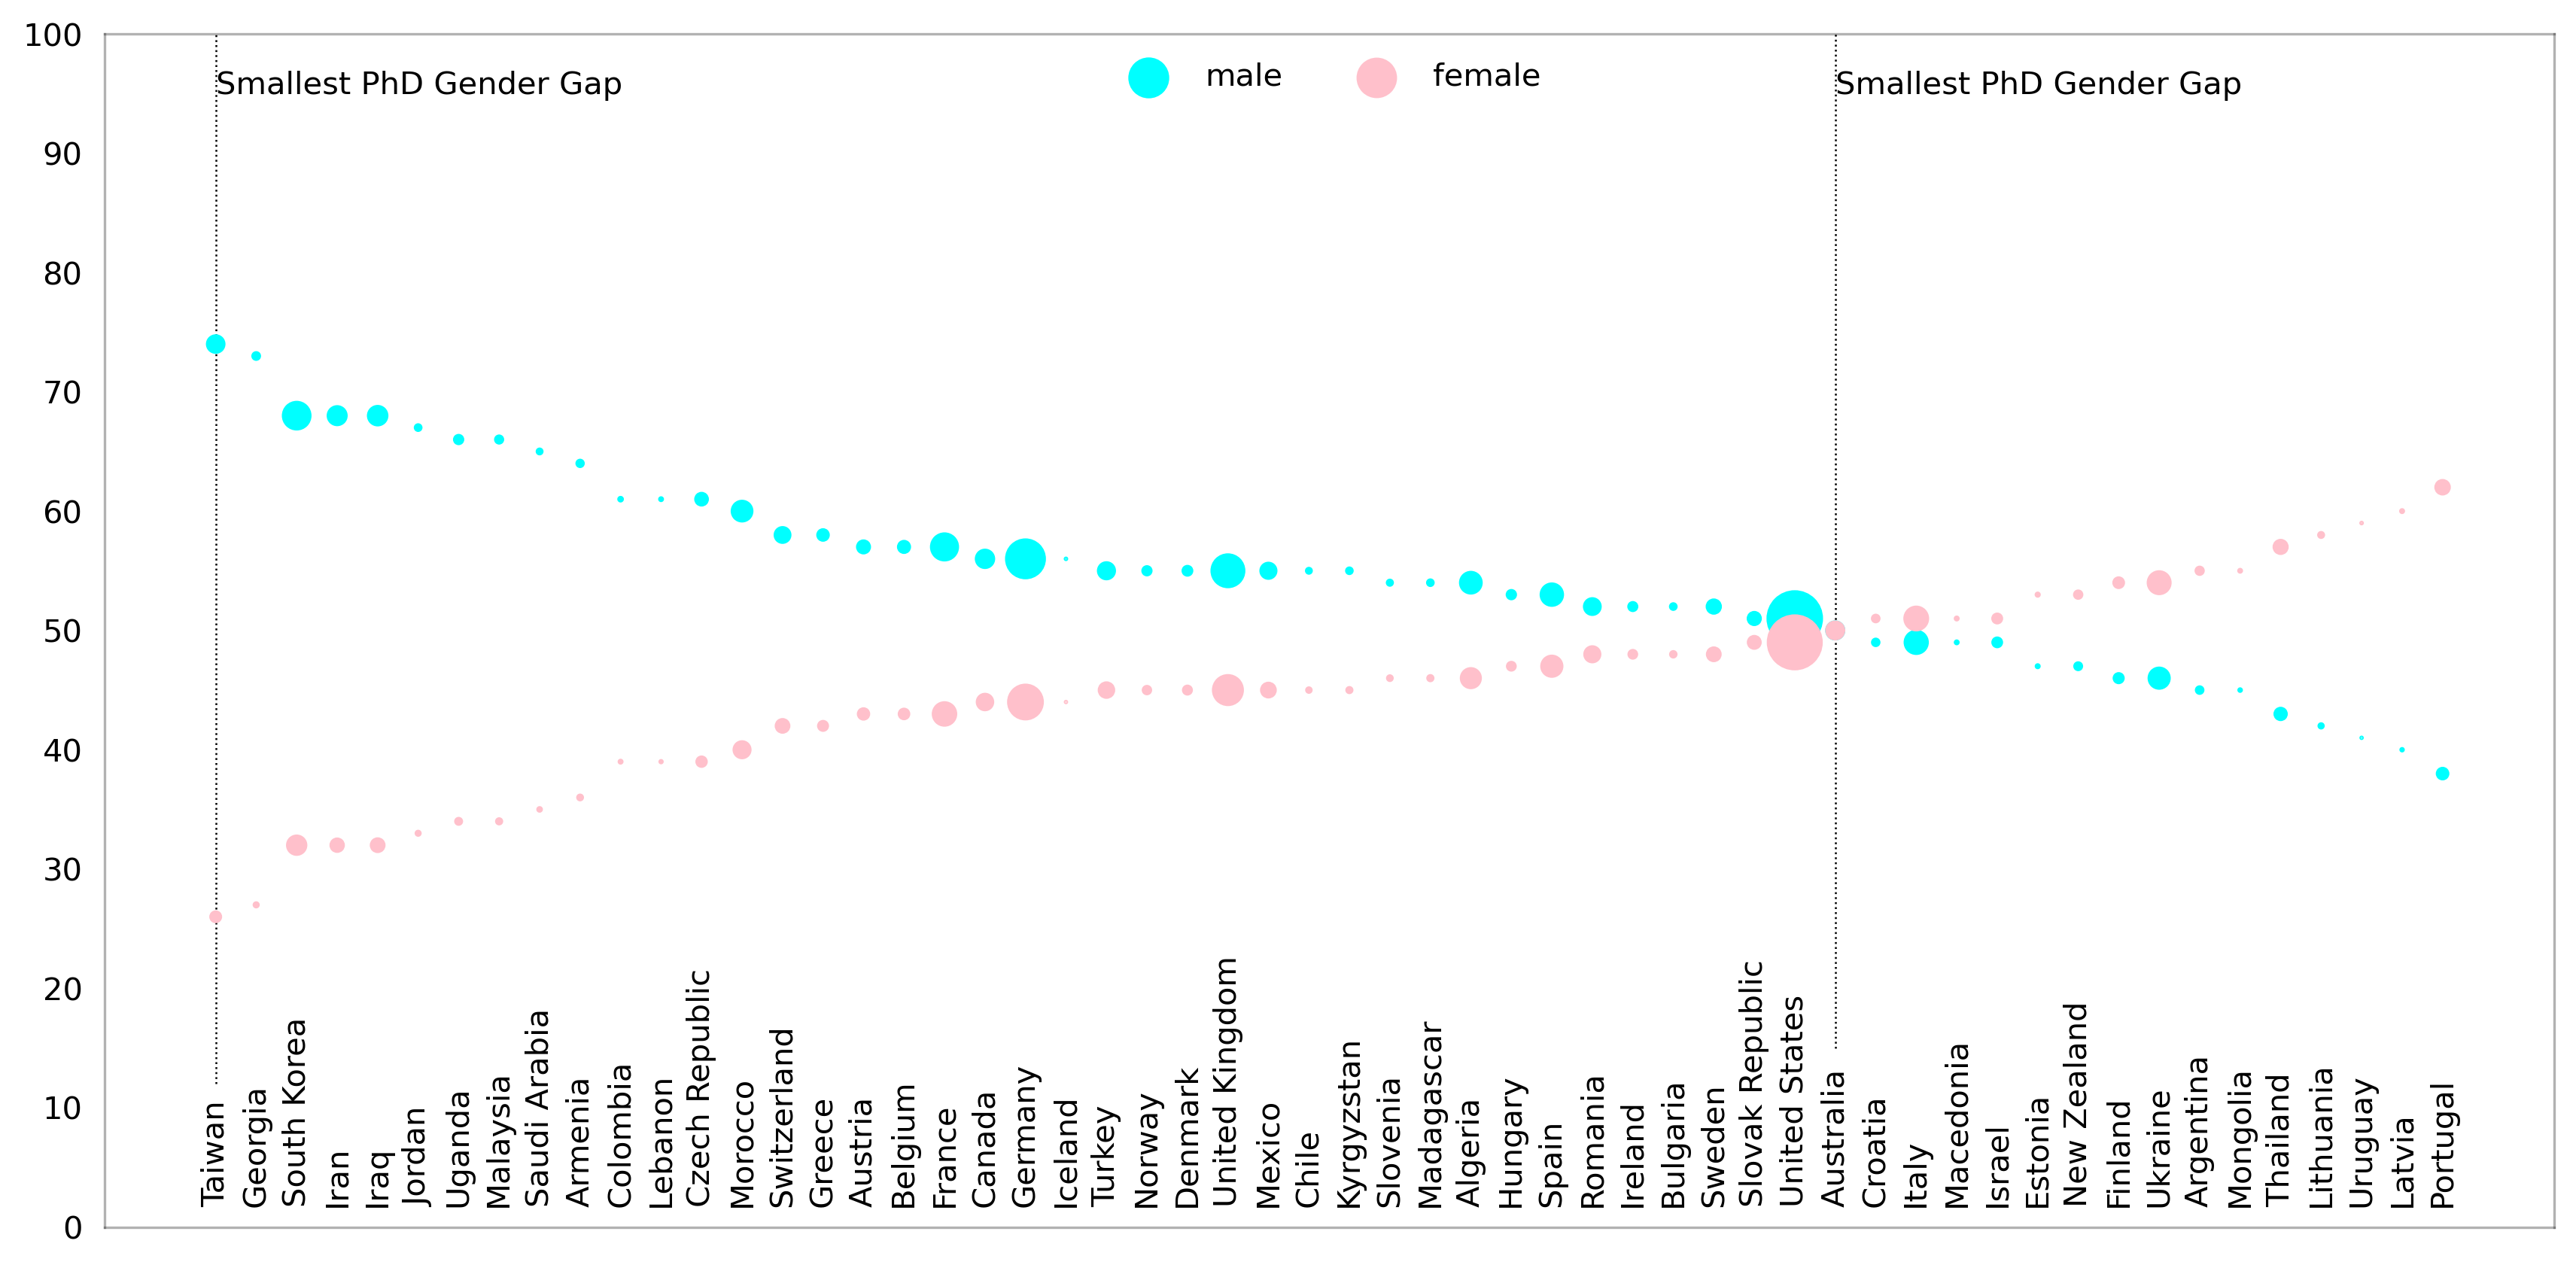

In [43]:
fig, ax = plt.subplots(figsize = (14, 7), dpi = 300)

x = range(0, df.shape[0])

#male scatter
ax.scatter(zorder = 3, x = x, y = df.perc_male, color = 'cyan', s = df.male / 100, label = 'male')

#female scatter
ax.scatter(zorder = 3, x = x, y = df.perc_female, color = 'pink', s = df.female / 100, label = 'female')


#set ylim, and ticks
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.10, 0.1), labels = range(0, 110, 10))

#x labels
ax.set_xticks(ticks = x, labels = df.index, rotation = 90, va = 'bottom')

#add vertical line for smallest PhD gender gap

df['minimum'] = abs(df.perc_male - df.perc_female)


mn = df[df.minimum == min(df.minimum)].index[0]

mx = df[df.minimum == max(df.minimum)].index[0]

df['idx'] = range(0, df.shape[0])

idx_mn = df.idx[df.index == mn]
idx_mx = df.idx[df.index == mx]

plt.annotate('Smallest PhD Gender Gap', (idx_mn + 0.01, 0.95))
plt.annotate('Smallest PhD Gender Gap', (idx_mx + 0.01, 0.95))

plt.vlines(zorder = 0, x = idx_mn, ymin = 0.15, ymax = 1, linestyle = 'dotted', linewidth = 0.6, color = 'black')
plt.vlines(zorder = 0, x = idx_mx, ymin = 0.12, ymax = 1, linestyle = 'dotted', linewidth = 0.6, color = 'black')

#lighten borders

for i in ['top', 'bottom', 'right', 'left']:
    ax.spines[i].set_alpha(0.3)
    
#remove ticks

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

xticks = [*ax.xaxis.get_major_ticks(), *ax.xaxis.get_minor_ticks()]

for tick in xticks:
        tick.set_pad(-10)
        
plt.legend(loc = 'upper center', ncol = 2, frameon = False)
        
plt.show()